In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_data1=pd.read_csv('/content/drive/My Drive/Assignment - Data Science/07-12-2020.csv')
df_data2=pd.read_csv('/content/drive/My Drive/Assignment - Data Science/csse_daily.csv')
df_data3=pd.read_csv('/content/drive/My Drive/Assignment - Data Science/time_series_covid19_confirmed_global.csv')
df_data4=pd.read_csv('/content/drive/My Drive/Assignment - Data Science/time_series_covid19_deaths_global.csv')
df_data5=pd.read_csv('/content/drive/My Drive/Assignment - Data Science/time_series_covid19_recovered_global.csv')

In [ ]:
df_data2['mortality_rate']=df_data2.apply(lambda x: 0 if x['Confirmed']==0 else np.round(((x['Deaths']/(x['Confirmed']+1.01))*10),2) ,axis=1)
df_data2['recovery_rate']=df_data2.apply(lambda x: 0 if x['Confirmed']==0 else np.round(((x['Recovered']/(x['Confirmed']+1.01))*10),2) ,axis=1)

#Graphing the number of confirmed cases, active cases, deaths, recoveries, mortality rate (CFR), and recovery rate

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


dropping3=df_data3.drop(['Province/State','Country/Region','Lat','Long'],axis=1).transpose()
confirmed_count=pd.DataFrame(dropping3.sum(axis=1),columns=['count'])
confirmed_count.index=pd.to_datetime(confirmed_count.index)


dropping5=df_data5.drop(['Province/State','Country/Region','Lat','Long'],axis=1).transpose()
recovery_count=pd.DataFrame(dropping5.sum(axis=1),columns=['count'])
recovery_count.index=pd.to_datetime(recovery_count.index)

dropping4=df_data4.drop(['Province/State','Country/Region','Lat','Long'],axis=1).transpose()
death_count=pd.DataFrame(dropping4.sum(axis=1),columns=['count'])
death_count.index=pd.to_datetime(death_count.index)




fig = go.Figure()
fig.add_trace(go.Scatter(x=death_count.index,y=death_count['count'],fill='tozeroy',name="death"))
fig.add_trace(go.Scatter(x=confirmed_count.index,y=confirmed_count['count'],fill='tozeroy',name="Confirmed_cases"))
fig.add_trace(go.Scatter(x=recovery_count.index,y=recovery_count['count'],fill='tozeroy',name="recovery_cases"))
fig.update_traces(mode='markers', marker_line_width=2, marker_size=5)
fig.update_layout(title='<b>World wide death, recovery and confirmed cases of corona from Jan 2020 till july 2020 </b>',
                  yaxis_zeroline=False, xaxis_zeroline=False)

fig.show()

In [ ]:
df_data2.head(1)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio,mortality_rate,recovery_rate
0,45001.0,Abbeville,South Carolina,US,2020-07-13 04:43:04,34.223334,-82.461707,153,1,0,152.0,"Abbeville, South Carolina, US",623.80234,0.653595,0.06,0.0


In [ ]:

df_grouped=df_data2.groupby(by='Country_Region').sum()
df_confirmed=df_grouped.sort_values(by=['Confirmed'],ascending=False)
df_active=df_grouped.sort_values(by=['Active'],ascending=False)
df_recoverd=df_grouped.sort_values(by=['Recovered'],ascending=False)
df_death=df_grouped.sort_values(by=['Deaths'],ascending=False)
df_mortility_rate=df_grouped.sort_values(by=['mortality_rate'],ascending=False)
df_revovery_rate=df_grouped.sort_values(by=['recovery_rate'],ascending=False)


fig = make_subplots(rows=6, cols=1, shared_yaxes=False,shared_xaxes=False,subplot_titles=('Confirmed cases','Active cases','Recovered cases','Death cases','Mortality_rate','Recovery_rate'))

fig.add_trace(go.Bar(y=df_confirmed['Confirmed'], x=df_confirmed.index,orientation='v'
                    ),
              1, 1)

fig.add_trace(go.Bar(y=df_active['Active'], x=df_active.index,orientation='v',
                    ),
              2,1)

fig.add_trace(go.Bar(y=df_recoverd['Recovered'], x=df_recoverd.index,orientation='v'
                    ),
              3,1)


fig.add_trace(go.Bar(y=df_death['Deaths'], x=df_death.index,orientation='v'
                    ),
              4,1)
fig.add_trace(go.Bar(y=df_mortility_rate['mortality_rate'], x=df_mortility_rate.index,orientation='v'
                    ),
              5,1)
fig.add_trace(go.Bar(y=df_revovery_rate['recovery_rate'], x=df_revovery_rate.index,orientation='v'
                    ),
              6,1)

fig.update_layout( height=3000,title_text="Global corona cases", showlegend=False)

fig.show()
#marker=dict(df_india_10['Country_Region'], coloraxis="coloraxis")

#World Daily Increases in confirmed cases, confirmed deaths, confirmed recoveries (Graph)

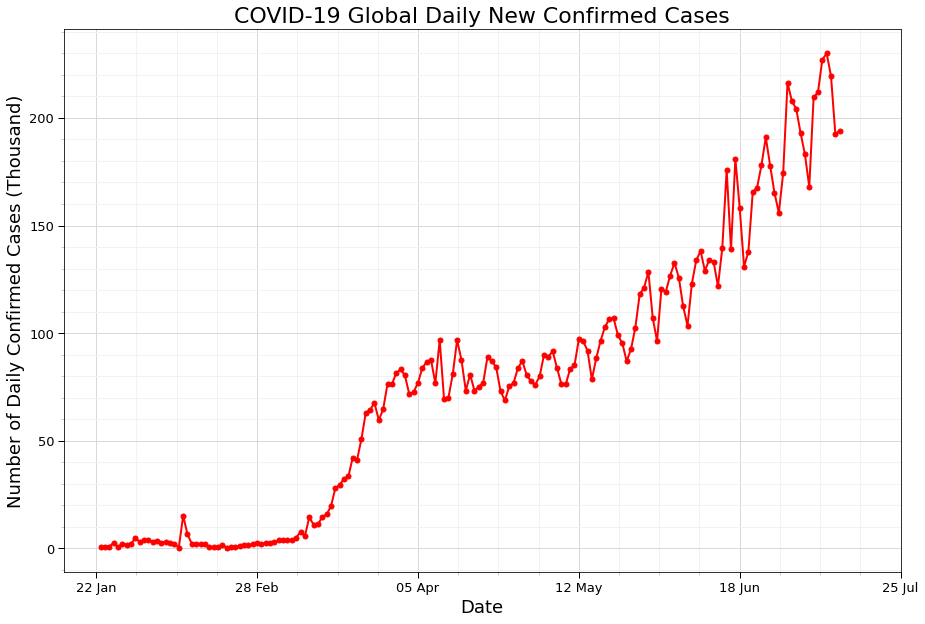

In [ ]:
temp_data = np.nan_to_num(df_data3.sum()[5:].diff())
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)
thousand=1000


date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=2, linestyle='-', marker='o',markersize=5)
plt.plot(date,temp_data/thousand,"-.",color="red",**marker_style)


nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=12)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

# Plot Title
plt.title("COVID-19 Global Daily New Confirmed Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Daily Confirmed Cases (Thousand)",fontsize =18)

# plt.yscale("log")
plt.tick_params(labelsize = 13) 

plt.show()

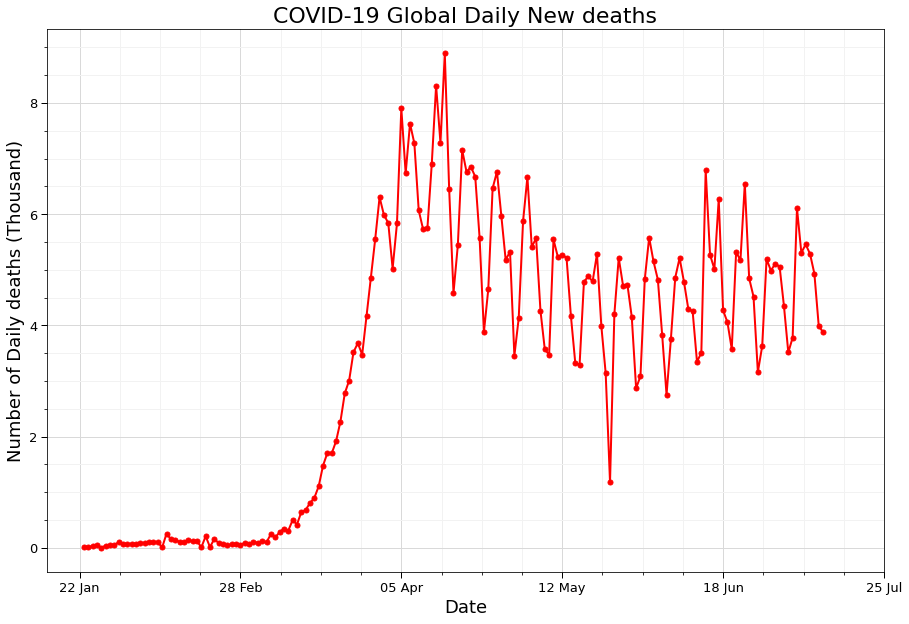

In [ ]:
temp_data = np.nan_to_num(df_data4.sum()[5:].diff())
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)
thousand=1000


date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=2, linestyle='-', marker='o',markersize=5)
plt.plot(date,temp_data/thousand,"-.",color="red",**marker_style)


nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=12)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.2')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

# Plot Title
plt.title("COVID-19 Global Daily New deaths",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Daily deaths (Thousand)",fontsize =18)

# plt.yscale("log")
plt.tick_params(labelsize = 13) 

plt.show()

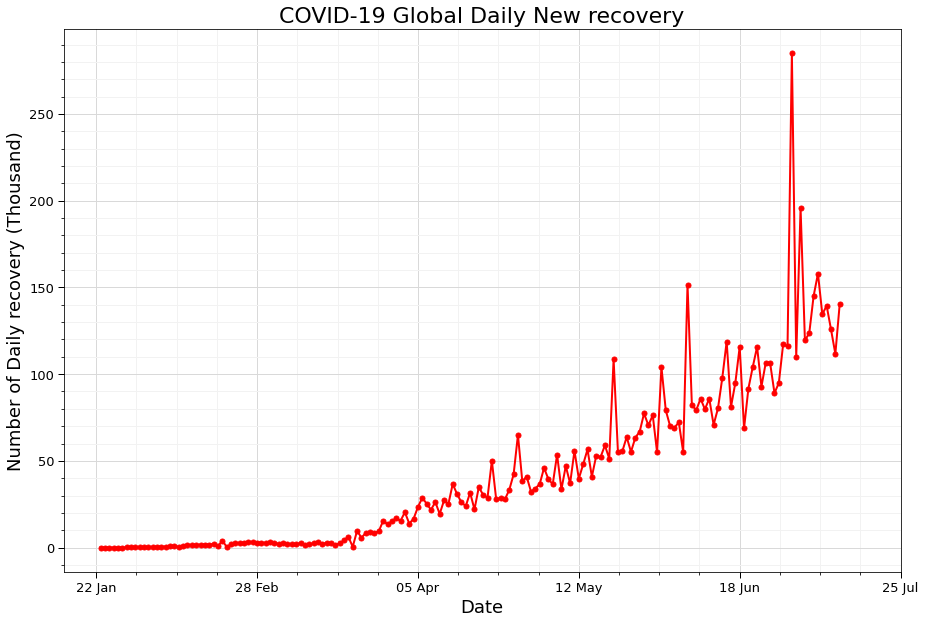

In [ ]:
temp_data = np.nan_to_num(df_data5.sum()[5:].diff())
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)
thousand=1000


date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=2, linestyle='-', marker='o',markersize=5)
plt.plot(date,temp_data/thousand,"-.",color="red",**marker_style)


nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=12)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.2')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

# Plot Title
plt.title("COVID-19 Global Daily New recovery",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Daily recovery (Thousand)",fontsize =18)

# plt.yscale("log")
plt.tick_params(labelsize = 13) 

plt.show()

#Log of cases over time, log of death over time, log of corona recoveries over time

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


dropping3=df_data3.drop(['Province/State','Country/Region','Lat','Long'],axis=1).transpose()
confirmed_count=pd.DataFrame(dropping3.sum(axis=1),columns=['count'])
confirmed_count.index=pd.to_datetime(confirmed_count.index)


dropping5=df_data5.drop(['Province/State','Country/Region','Lat','Long'],axis=1).transpose()
recovery_count=pd.DataFrame(dropping5.sum(axis=1),columns=['count'])
recovery_count.index=pd.to_datetime(recovery_count.index)

dropping4=df_data4.drop(['Province/State','Country/Region','Lat','Long'],axis=1).transpose()
death_count=pd.DataFrame(dropping4.sum(axis=1),columns=['count'])
death_count.index=pd.to_datetime(death_count.index)




fig = go.Figure()
fig.add_trace(go.Scatter(x=death_count.index,y=np.log((death_count['count'])+1),fill='tozeroy',name="death"))
fig.add_trace(go.Scatter(x=confirmed_count.index,y=np.log((confirmed_count['count'])+1),fill='tozeroy',name="Confirmed_cases"))
fig.add_trace(go.Scatter(x=recovery_count.index,y=np.log((recovery_count['count'])+1),fill='tozeroy',name="recovery_cases"))
fig.update_traces(mode='markers', marker_line_width=2, marker_size=5)
fig.update_layout(title='<b>World wide death, recovery and confirmed cases of corona from Jan 2020 till july 2020 in log scale </b>',
                  yaxis_zeroline=False, xaxis_zeroline=False)

fig.show()

#Country specific Cases, death, recoveries graph







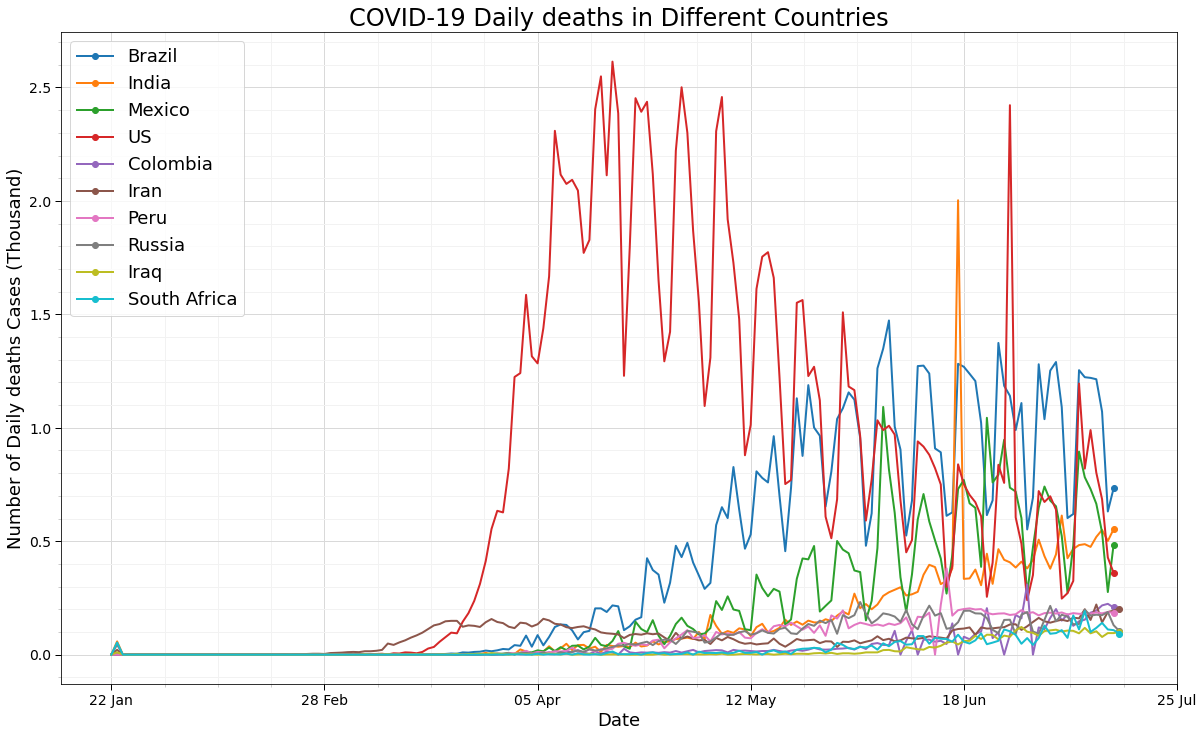

In [ ]:
thoudand = 1000
temp = df_data4.groupby('Country/Region').sum().diff(axis=1).sort_values(df_data4.columns[-1],ascending =False).head(10).replace(np.nan,0)
threshold = 0
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    t = temp.loc[temp.index== country].values[0]
    t = t[t>=threshold]
    
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/thoudand,'-o',label = country,linewidth =2, markevery=[-1])


nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

# Plot Title
plt.title("COVID-19 Daily deaths in Different Countries",{'fontsize':24})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Daily deaths Cases (Thousand)",fontsize =18)

# plt.yscale("log")
plt.legend(fontsize=18) 

plt.show()

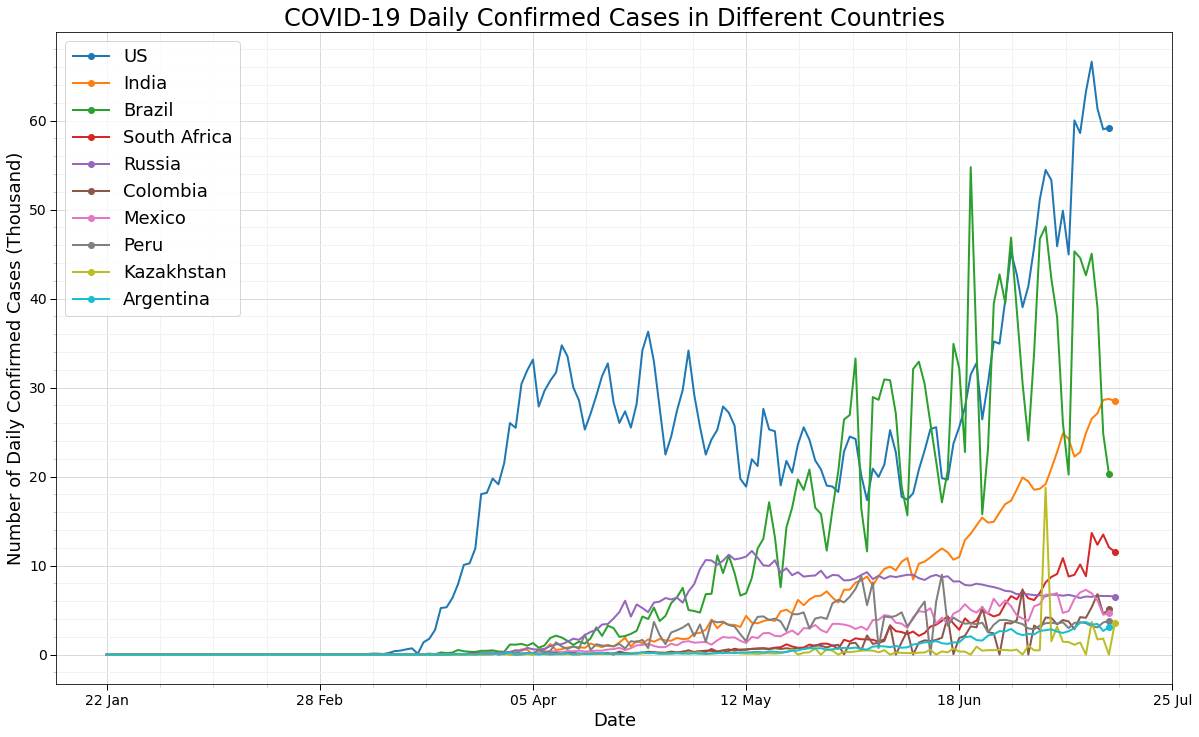

In [ ]:
thoudand = 1000
temp = df_data3.groupby('Country/Region').sum().diff(axis=1).sort_values(df_data4.columns[-1],ascending =False).head(10).replace(np.nan,0)
threshold = 0
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    t = temp.loc[temp.index== country].values[0]
    t = t[t>=threshold]
    
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/thoudand,'-o',label = country,linewidth =2, markevery=[-1])


nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

# Plot Title
plt.title("COVID-19 Daily Confirmed Cases in Different Countries",{'fontsize':24})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Daily Confirmed Cases (Thousand)",fontsize =18)

# plt.yscale("log")
plt.legend(fontsize=18) 

plt.show()

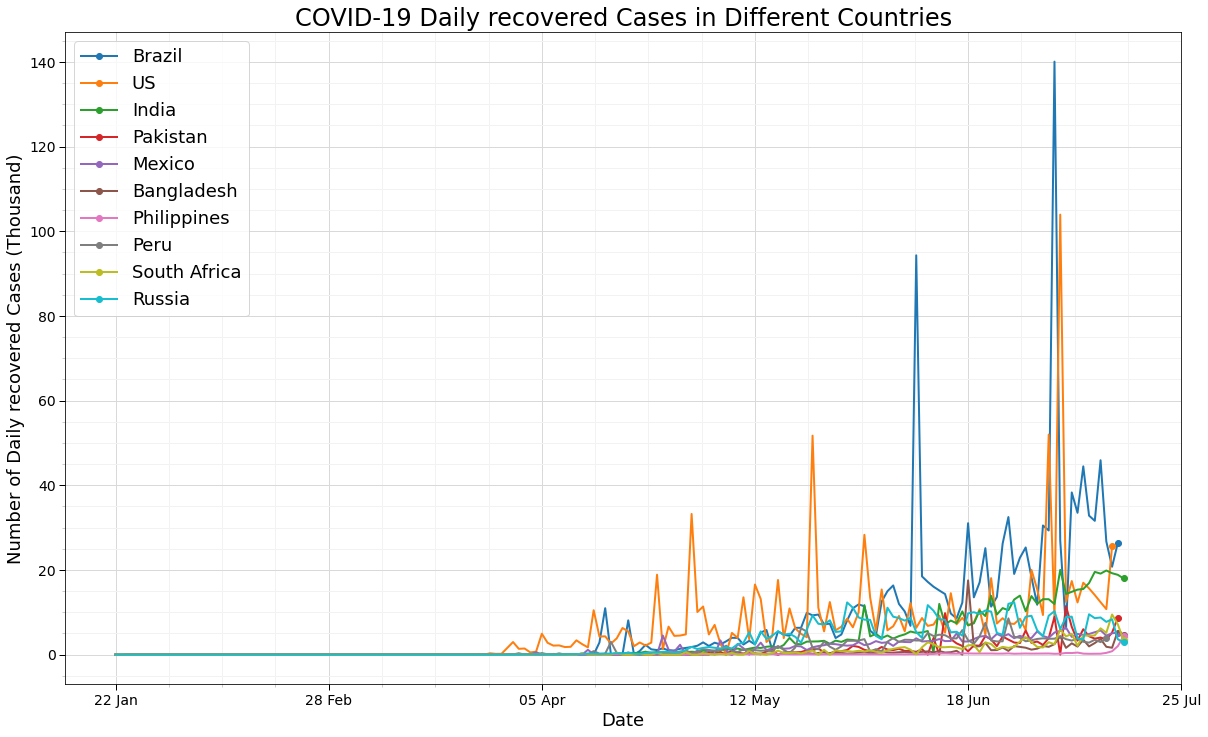

In [ ]:
thoudand = 1000
temp = df_data5.groupby('Country/Region').sum().diff(axis=1).sort_values(df_data4.columns[-1],ascending =False).head(10).replace(np.nan,0)
threshold = 0
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    t = temp.loc[temp.index== country].values[0]
    t = t[t>=threshold]
    
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/thoudand,'-o',label = country,linewidth =2, markevery=[-1])


nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

# Plot Title
plt.title("COVID-19 Daily recovered Cases in Different Countries",{'fontsize':24})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Daily recovered Cases (Thousand)",fontsize =18)

# plt.yscale("log")
plt.legend(fontsize=18) 

plt.show()

# Prediction of confirmed cases

In [ ]:
from keras.layers import Input, Dense, Activation, LeakyReLU, Dropout
from keras import models
from keras.optimizers import RMSprop, Adam

Visible = Input(shape=(1,))
Dense_l1 = Dense(80,name="Dense_l1")(Visible)
LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

Dense_l2 = Dense(80,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

Dense_l3 = Dense(80,name = "Dense_l3")(LRelu_l2)
LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

Dense_l4 = Dense(1,name="Dense_l4")(LRelu_l3)
LRelu_l4 = LeakyReLU(name = "Output")(Dense_l4
                                      )
model = models.Model(inputs=Visible, outputs=LRelu_l4)
model.compile(optimizer=Adam(lr=0.001), 
               loss='mean_squared_error',
               metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 80)                160       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l3 (LeakyReLU)         (None, 80)                0   

In [ ]:
data_y = np.log10(np.asarray(df_data3.iloc[:,4:].sum(axis =0)).astype("float32"))
data_x = np.arange(1,len(data_y)+1)

In [ ]:
epochs = 996
model.fit(data_x.reshape([data_y.shape[0],1]),data_y.reshape([data_y.shape[0],1]),epochs=epochs)

Epoch 1/996
174/174 [==============================] - 0s 193us/step - loss: 0.0863 - accuracy: 0.0000e+00
Epoch 2/996
174/174 [==============================] - 0s 127us/step - loss: 0.2020 - accuracy: 0.0000e+00
Epoch 3/996
174/174 [==============================] - 0s 111us/step - loss: 0.2193 - accuracy: 0.0000e+00
Epoch 4/996
174/174 [==============================] - 0s 120us/step - loss: 0.0805 - accuracy: 0.0000e+00
Epoch 5/996
174/174 [==============================] - 0s 109us/step - loss: 0.0187 - accuracy: 0.0000e+00
Epoch 6/996
174/174 [==============================] - 0s 115us/step - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 7/996
174/174 [==============================] - 0s 107us/step - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 8/996
174/174 [==============================] - 0s 106us/step - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 9/996
174/174 [==============================] - 0s 102us/step - loss: 0.0075 - accuracy: 0.0000e+00
Epoch 10/996
174/174 [===============

In [ ]:
model.save('model_confirmed_v4.h5')

In [ ]:
df_data3.head(1)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455


In [ ]:
case_nums_country = df_data3.transpose().drop(['Country/Region','Province/State','Lat','Long'])
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]
#case_nums_country.index

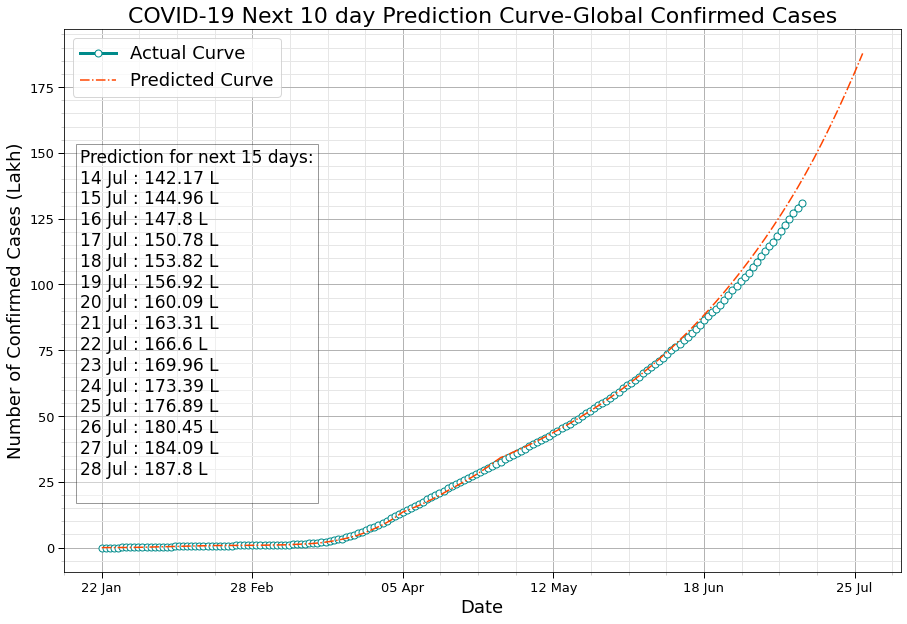

In [ ]:
from datetime import datetime, timedelta,date
from matplotlib import ticker
lakh = 100000
prediction_days = 15

temp_data = df_data3.iloc[:,5:].sum(axis =0)
data = np.power(10,model.predict(np.arange(1,len(temp_data)+prediction_days+1)))
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,temp_data/lakh,"-.",color="darkcyan",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data/lakh,"-.",color="orangered",label="Predicted Curve")

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d + nextdays

text = "Prediction for next "+str(prediction_days) +" days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(prediction_days-i)],-3)[0]/lakh)+" L\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

# Plot Title
plt.title("COVID-19 Next 10 day Prediction Curve-Global Confirmed Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Confirmed Cases (Lakh)",fontsize =18)

# plt.yscale("log")
plt.legend(fontsize =18)
plt.tick_params(labelsize = 13) 

plt.show()

# Prediction for Recoveries

In [ ]:
data_y_recovery = np.log10(np.asarray(df_data5.iloc[:,4:].sum(axis =0)).astype("float32"))
data_x_recovery = np.arange(1,len(data_y)+1)

In [ ]:
epochs = 754
model.fit(data_x_recovery.reshape([data_y_recovery.shape[0],1]),data_y_recovery.reshape([data_y_recovery.shape[0],1]),epochs=epochs)

Epoch 1/754
174/174 [==============================] - 0s 96us/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 2/754
174/174 [==============================] - 0s 77us/step - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 3/754
174/174 [==============================] - 0s 110us/step - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 4/754
174/174 [==============================] - 0s 70us/step - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 5/754
174/174 [==============================] - 0s 68us/step - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 6/754
174/174 [==============================] - 0s 64us/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 7/754
174/174 [==============================] - 0s 67us/step - loss: 0.0071 - accuracy: 0.0000e+00
Epoch 8/754
174/174 [==============================] - 0s 63us/step - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 9/754
174/174 [==============================] - 0s 65us/step - loss: 0.0117 - accuracy: 0.0000e+00
Epoch 10/754
174/174 [=======================

In [ ]:
model.save('model_recoveries_v4.h5')

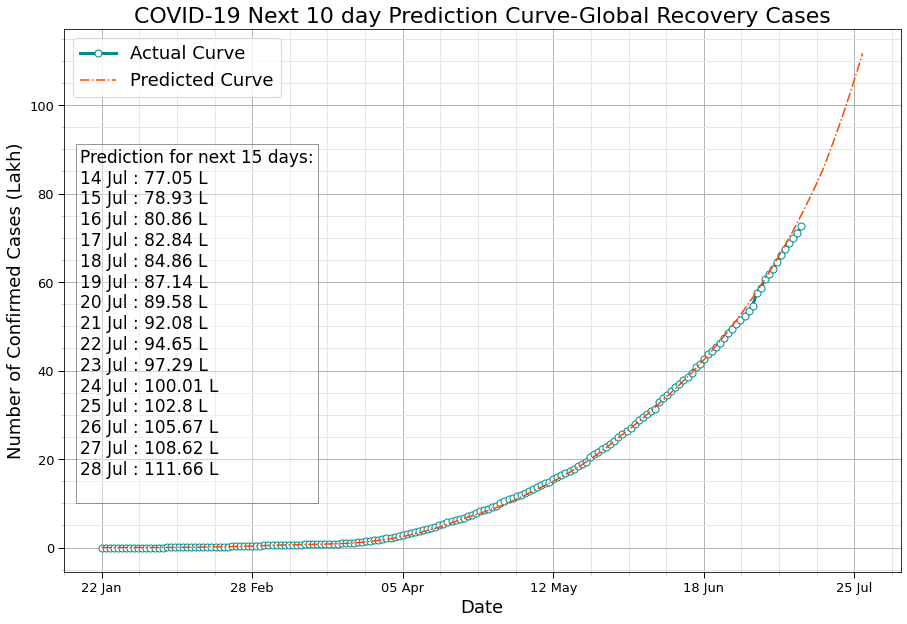

In [ ]:
lakh = 100000
prediction_days = 15

temp_data = df_data5.iloc[:,5:].sum(axis =0)
data = np.power(10,model.predict(np.arange(1,len(temp_data)+prediction_days+1)))
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,temp_data/lakh,"-.",color="darkcyan",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data/lakh,"-.",color="orangered",label="Predicted Curve")

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d + nextdays

text = "Prediction for next "+str(prediction_days) +" days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(prediction_days-i)],-3)[0]/lakh)+" L\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

# Plot Title
plt.title("COVID-19 Next 10 day Prediction Curve-Global Recovery Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of recovered Cases (Lakh)",fontsize =18)

# plt.yscale("log")
plt.legend(fontsize =18)
plt.tick_params(labelsize = 13) 

plt.show()

#Prediction for death

In [ ]:
data_y_death = np.log10(np.asarray(df_data4.iloc[:,4:].sum(axis =0)).astype("float32"))
data_x_death = np.arange(1,len(data_y)+1)

In [ ]:
epochs = 520
model.fit(data_x_death.reshape([data_y_death.shape[0],1]),data_y_death.reshape([data_y_death.shape[0],1]),epochs=epochs)

Epoch 1/520
174/174 [==============================] - 0s 147us/step - loss: 3.2116e-04 - accuracy: 0.0000e+00
Epoch 2/520
174/174 [==============================] - 0s 101us/step - loss: 3.2903e-04 - accuracy: 0.0000e+00
Epoch 3/520
174/174 [==============================] - 0s 115us/step - loss: 4.5730e-04 - accuracy: 0.0000e+00
Epoch 4/520
174/174 [==============================] - 0s 101us/step - loss: 3.2308e-04 - accuracy: 0.0000e+00
Epoch 5/520
174/174 [==============================] - 0s 90us/step - loss: 3.2415e-04 - accuracy: 0.0000e+00
Epoch 6/520
174/174 [==============================] - 0s 102us/step - loss: 4.2320e-04 - accuracy: 0.0000e+00
Epoch 7/520
174/174 [==============================] - 0s 105us/step - loss: 2.9522e-04 - accuracy: 0.0000e+00
Epoch 8/520
174/174 [==============================] - 0s 102us/step - loss: 3.6667e-04 - accuracy: 0.0000e+00
Epoch 9/520
174/174 [==============================] - 0s 101us/step - loss: 3.0599e-04 - accuracy: 0.0000e+00
Ep

In [ ]:
model.save('model_deaths_v4.h5')

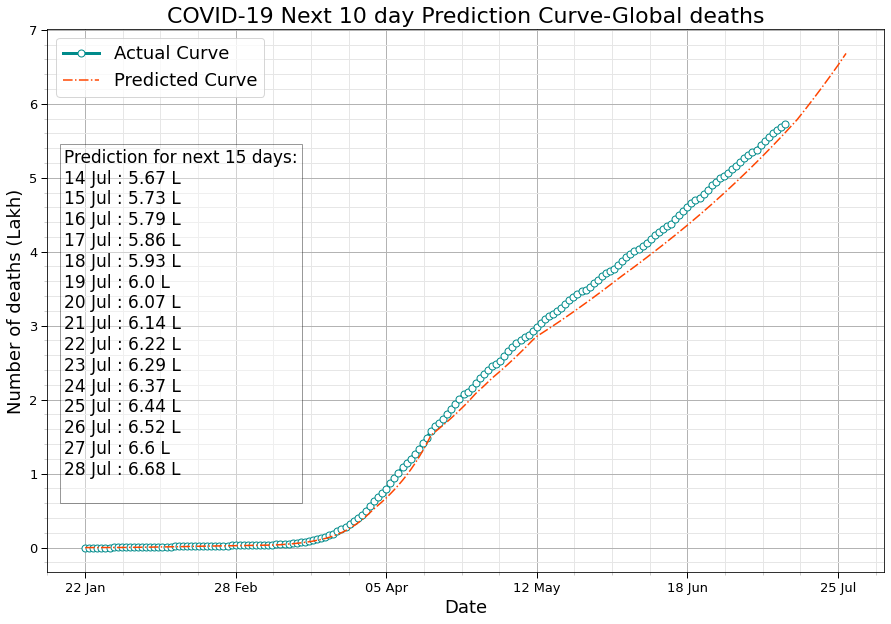

In [ ]:
lakh = 100000
prediction_days = 15

temp_data = df_data4.iloc[:,5:].sum(axis =0)
data = np.power(10,model.predict(np.arange(1,len(temp_data)+prediction_days+1)))
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,temp_data/lakh,"-.",color="darkcyan",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data/lakh,"-.",color="orangered",label="Predicted Curve")

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d + nextdays

text = "Prediction for next "+str(prediction_days) +" days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(prediction_days-i)],-3)[0]/lakh)+" L\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

# Plot Title
plt.title("COVID-19 Next 10 day Prediction Curve-Global deaths",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of deaths (Lakh)",fontsize =18)

# plt.yscale("log")
plt.legend(fontsize =18)
plt.tick_params(labelsize = 13) 

plt.show()